In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('ext_rate_n10000.csv')
dftraj = pd.read_csv('trajectories_n10000.csv')

df = pd.merge(df, dftraj, on=['SeasonLength','Trajectory'])
df['Dead'] = df['FinalTime'] < 150
df['DeadWhen'] = df['Time'] + 50 > df['FinalTime']
df['Round'] = np.minimum(df['Time'] // df['SeasonLength'], 100 // df['SeasonLength'])
df['Ab'] = df['Round'] % 2

#df = df[df['Trajectory'] < 1000]
df = df[df['SeasonLength'] >= 30]
df

,SeasonLength,Trajectory,FinalTime,Time,x0,x1,x2,x3,Dead,DeadWhen,Round,Ab
3839037,30,0,150.1,30.0,2,95,0,0,False,False,1.0,1.0
3839038,30,0,150.1,60.0,9,0,65,0,False,False,2.0,0.0
3839039,30,0,150.1,90.1,58,0,0,0,False,False,3.0,1.0
3839040,30,1,150.1,30.0,53,0,0,0,False,False,1.0,1.0
3839041,30,1,150.1,60.0,1,0,69,2,False,False,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4772182,100,9995,150.1,100.1,1,72,0,0,False,False,1.0,1.0
4772183,100,9996,112.6,100.1,0,75,0,0,True,True,1.0,1.0
4772184,100,9997,150.1,100.1,2,74,0,0,False,False,1.0,1.0
4772185,100,9998,150.1,100.1,46,0,0,0,False,False,1.0,1.0


In [3]:
#X1 = df.drop(columns=['Trajectory','FinalTime','Time','Dead','Ab','Round','SeasonLength'])  # Las 5 features
#X2 = df.drop(columns=['Trajectory','FinalTime','Time','Dead','Ab','Round'])  # Las 5 features
#X3 = df.drop(columns=['Trajectory','FinalTime','Time','Dead','Ab'])  # Las 5 features

X4 = df.drop(columns=['Trajectory','FinalTime','Time','Dead','Round','SeasonLength','DeadWhen'])  # Las 5 features

X4['x1A'] = X4['x1']*X4['Ab']
X4['x1B'] = X4['x1']*(1-X4['Ab'])
X4['x2A'] = X4['x2']*X4['Ab']
X4['x2B'] = X4['x2']*(1-X4['Ab'])

X4 = X4.drop(columns=['x1','x2','Ab'])

#X4['Intercept'] = 1

y = df['DeadWhen'].astype(int)   # Convertimos True/False a 1/0

In [4]:
# Crear el modelo
model4 = LogisticRegression(max_iter=4000, verbose=0,C=100)  # Puedes aumentar max_iter si no converge

# Ajustar el modelo
model4.fit(X4, y)
print('... Model 4 fitted')
coefficients4 = pd.Series(model4.coef_[0], index=X4.columns)
print(coefficients4)

... Model 4 fitted
x0    -0.231164
x3    -1.095430
x1A   -0.004949
x1B   -0.429122
x2A   -0.512507
x2B   -0.005999
dtype: float64


In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss

y_pred = model4.predict(X4)
y_pred_proba = model4.predict_proba(X4)[:,1]

print("Accuracy:", round(accuracy_score(y, y_pred),4))
print("AUC:", round(roc_auc_score(y, y_pred_proba),4))
print("Log-loss:", round(log_loss(y, y_pred_proba),4))
print("Score (pseudo R^2 ~ McFadden):", round(model4.score(X4, y),4))

Accuracy: 0.9145
AUC: 0.9589
Log-loss: 0.2118
Score (pseudo R^2 ~ McFadden): 0.9145


In [12]:
#df['p_model1'] = model1.predict_proba(X1)[:,1]
#df['p_model2'] = model2.predict_proba(X2)[:,1]
#df['p_model3'] = model3.predict_proba(X3)[:,1]
df['p_model4'] = model4.predict_proba(X4)[:,1]

df

,SeasonLength,Trajectory,FinalTime,Time,x0,x1,x2,x3,Dead,DeadWhen,Round,Ab,p_model4
3839037,30,0,150.1,30.0,2,95,0,0,False,False,1.0,1.0,0.511556
3839038,30,0,150.1,60.0,9,0,65,0,False,False,2.0,0.0,0.183664
3839039,30,0,150.1,90.1,58,0,0,0,False,False,3.0,1.0,0.000004
3839040,30,1,150.1,30.0,53,0,0,0,False,False,1.0,1.0,0.000013
3839041,30,1,150.1,60.0,1,0,69,2,False,False,2.0,0.0,0.135023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772182,100,9995,150.1,100.1,1,72,0,0,False,False,1.0,1.0,0.596576
4772183,100,9996,112.6,100.1,0,75,0,0,True,True,1.0,1.0,0.647378
4772184,100,9997,150.1,100.1,2,74,0,0,False,False,1.0,1.0,0.537469
4772185,100,9998,150.1,100.1,46,0,0,0,False,False,1.0,1.0,0.000064


In [13]:
df = df.sort_values(by=['SeasonLength', 'Trajectory', 'Round'])

# Lista de columnas de entrada y sus salidas
#p_columns = ['p_model1', 'p_model2', 'p_model3', 'p_model4']
p_columns = ['p_model4']
#P_columns = ['P_model1', 'P_model2', 'P_model3', 'P_model4']
P_columns = ['P_model4']

# Inicializar columnas de salida
for P_col in P_columns:
    df[P_col] = np.nan

# Agrupar una vez para eficiencia
grouped = df.groupby(['SeasonLength', 'Trajectory'])

# Iterar con barra de progreso
for (seasonlength, trajectory), group_idx in tqdm(grouped.groups.items(), desc="Procesando grupos"):
    for p_col, P_col in zip(p_columns, P_columns):
        p_vals = df.loc[group_idx, p_col]
        cumprod = (1 - p_vals).shift().cumprod().fillna(1)
        df.loc[group_idx, P_col] = p_vals * cumprod

Procesando grupos: 100%|██████████████| 710000/710000 [04:15<00:00, 2776.80it/s]


In [14]:
#dfext = df.groupby(['SeasonLength','Trajectory']).mean(numeric_only=True).reset_index()
dfext = df.groupby(['SeasonLength','Round']).mean(numeric_only=True).reset_index()
dfext = dfext.groupby(['SeasonLength']).sum(numeric_only=True).reset_index()
#dfext = dfext.groupby(['SeasonLength']).mean(numeric_only=True).reset_index()
dfext

,SeasonLength,Round,Trajectory,FinalTime,Time,x0,x1,x2,x3,Dead,DeadWhen,Ab,p_model4,P_model4
0,30,6.0,15017.069236,428.290800,180.1,102.792921,32.253618,15.945291,6.725289,0.367938,0.256408,2.0,0.224462,0.217140
1,31,6.0,14999.454936,427.610368,186.1,101.717316,33.454729,16.598228,6.933162,0.387766,0.265979,2.0,0.231915,0.223623
2,32,6.0,14997.670312,427.278469,192.1,100.382159,34.407870,17.522151,7.510468,0.417244,0.270867,2.0,0.243812,0.234348
3,33,6.0,15003.310870,426.215695,198.1,97.890542,36.858089,18.496949,8.619937,0.455335,0.290414,2.0,0.259968,0.249231
4,34,3.0,9996.944252,282.973477,102.0,66.986070,18.085802,18.617407,3.043853,0.235387,0.180787,1.0,0.173819,0.171584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,96,1.0,4999.500000,141.468280,96.1,18.082500,46.763300,0.045100,1.957500,0.256400,0.256200,1.0,0.254440,0.254440
67,97,1.0,4999.500000,141.797110,97.1,18.290900,46.357100,0.042100,1.945300,0.254700,0.254700,1.0,0.251042,0.251042
68,98,1.0,4999.500000,142.090890,98.1,18.362900,46.346700,0.041300,1.929900,0.253100,0.252700,1.0,0.248835,0.248835
69,99,1.0,4999.500000,142.324960,99.1,18.278700,46.340500,0.035400,1.983000,0.254000,0.253900,1.0,0.251622,0.251622


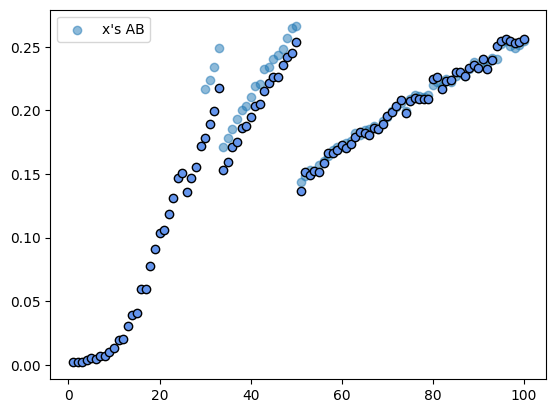

In [15]:
#------------------------
dfaux = pd.read_csv('../Extinction curve-Tau/ext_rate_n10000.csv')
dfaux['Dead'] = dfaux['FinalTime'] < 150

dfextaux = dfaux.groupby(['Dead', 'SeasonLength','Trajectory']).count().reset_index()
dfextaux = dfextaux.groupby(['Dead', 'SeasonLength']).count().reset_index()
dfextaux['ExtRate'] = 1 - dfextaux['Trajectory']/10000

dfextaux = dfextaux[dfextaux['Dead']==False]
plt.scatter(dfextaux['SeasonLength'], dfextaux['ExtRate'], ec='black',color='cornflowerblue',zorder=10)
#------------------------

#plt.scatter(dfext['SeasonLength'], dfext['P_model1'],label='x\'s only',alpha=0.5)
#plt.scatter(dfext['SeasonLength'], dfext['P_model2'],label='x\'s plus seasonLength',alpha=0.5)
#plt.scatter(dfext['SeasonLength'], dfext['P_model3'],label='x\'s plus seasonLength plus round',alpha=0.5)
plt.scatter(dfext['SeasonLength'], dfext['P_model4'],label='x\'s AB',alpha=0.5)




plt.legend()
plt.show()

In [16]:
dfextaux

,Dead,SeasonLength,Trajectory,FinalTime,ExtRate
0,False,1,9982,9982,0.0018
1,False,2,9981,9981,0.0019
2,False,3,9975,9975,0.0025
3,False,4,9965,9965,0.0035
4,False,5,9949,9949,0.0051
...,...,...,...,...,...
95,False,96,7436,7436,0.2564
96,False,97,7453,7453,0.2547
97,False,98,7469,7469,0.2531
98,False,99,7460,7460,0.2540


In [17]:
df.to_csv('prediccion_sigmoideX30.csv')